# Лабораторная работа № 3. Логистическая регрессия

Библиотеки

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import datasets

In [76]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Графики

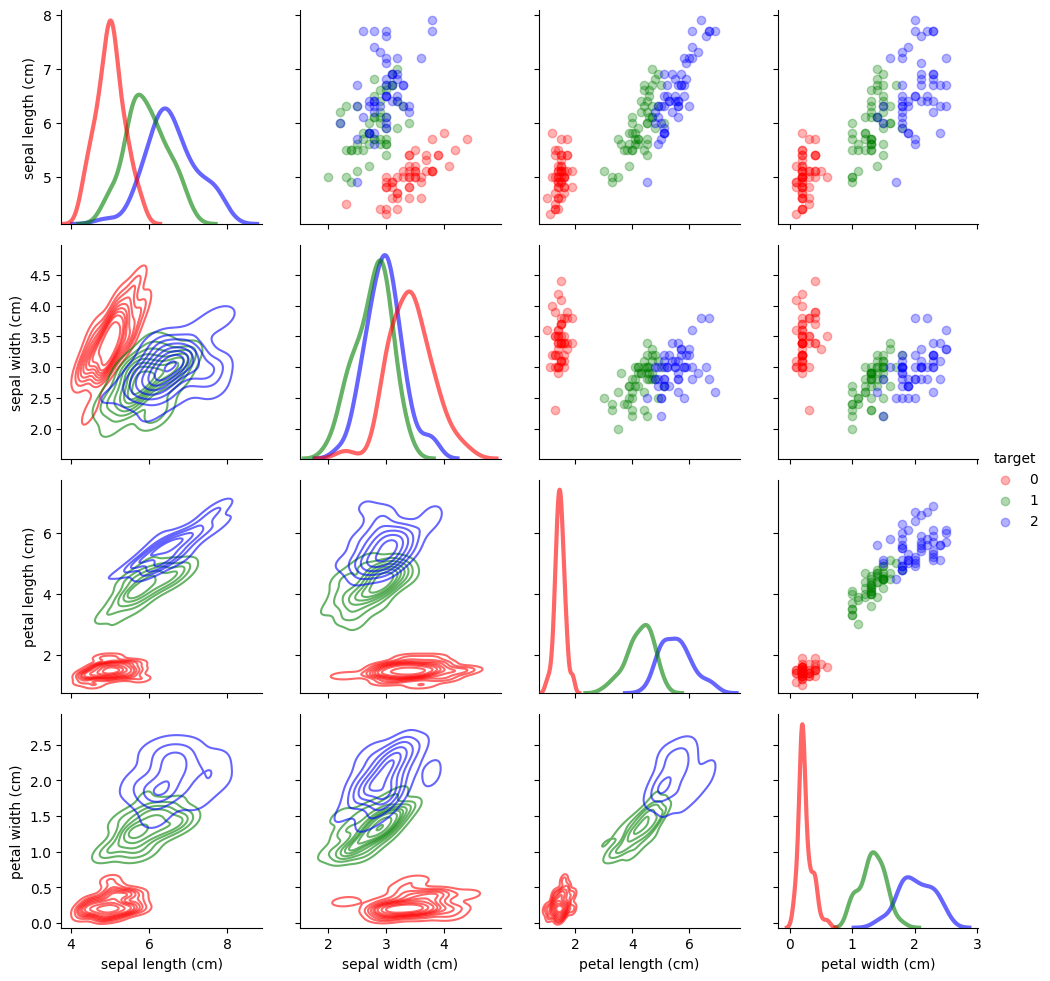

In [77]:
graph = sns.PairGrid(data, hue='target', diag_sharey=False, palette=['r', 'g', 'b'])
graph.map_lower(sns.kdeplot, alpha=0.6)
graph.map_upper(plt.scatter, alpha=0.3)
graph.map_diag(sns.kdeplot, lw=3, alpha=0.6, common_norm=False)
graph.add_legend()
plt.show()

Здесь

* 0 - setosa
* 1 - versicolor
* 2 - virginica

Заметно, что для versicolor и virginica признаки petal length и petal width сильно зависят друг от друга, в отличие от setosa.

С другой стороны, у setosa есть более выраженная зависимость sepal length и sepal width

Делим на 2 датасета: setosa & versicolor, versicolor & virginica 

In [78]:
data1 = data[data['target'] < 2]
data2 = data[data['target'] > 0]

In [79]:
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [80]:
data2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


Делим на обучающую и тестовую части

In [81]:
train1, test1 = train_test_split(data1, test_size=0.2)
train2, test2 = train_test_split(data2, test_size=0.2)

Выбираем модель и обучаем каждый датасет, затем выводим их значения score

In [82]:
real_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [83]:
model1 = LogisticRegression(random_state=0)

X_train1 = train1[real_features]
Y_train1 = train1['target']

model1.fit(X_train1, Y_train1)

LogisticRegression(random_state=0)

In [84]:
X_test1 = test1[real_features]
Y_test1 = test1['target']

Y_pred1 = model1.predict(X_test1)

Y_pred1

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0])

In [85]:
score1 = model1.score(X_test1, Y_test1)
score1

1.0

In [86]:
model2 = LogisticRegression(random_state=0)

X_train2 = train2[real_features]
Y_train2 = train2['target']

model2.fit(X_train2, Y_train2)

LogisticRegression(random_state=0)

In [87]:
X_test2 = test2[real_features]
Y_test2 = test2['target']

Y_pred2 = model2.predict(X_test2)

Y_pred2

array([1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [88]:
score2 = model2.score(X_test2, Y_test2)
score2

1.0

Теперь случайно генерируем датасет

In [89]:
X, y = datasets.make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=1)

random_df = pd.DataFrame(X)
random_df['y'] = y

random_df.head()

,0,1,y
0,1.536830,-1.398694,1
1,1.369176,-0.637344,1
2,0.502318,-0.459105,1
3,1.833193,-1.298082,1
4,1.042356,1.121529,0


График

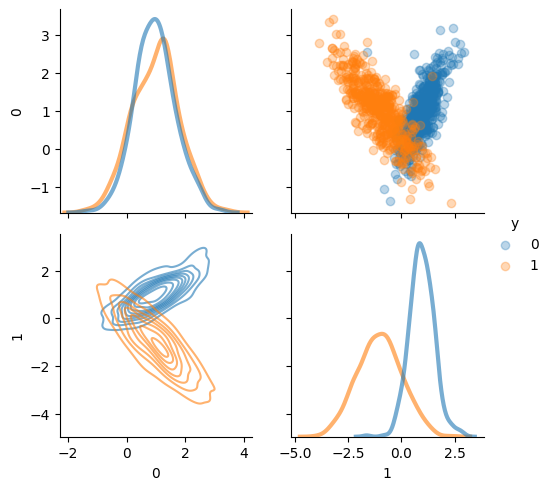

In [90]:
graph = sns.PairGrid(random_df, hue='y', diag_sharey=False)
graph.map_lower(sns.kdeplot, alpha=0.6)
graph.map_upper(plt.scatter, alpha=0.3)
graph.map_diag(sns.kdeplot, lw=3, alpha=0.6, common_norm=False)
graph.add_legend()
plt.show()

Аналогично проводим бинарную классификацию

In [91]:
train, test = train_test_split(random_df, test_size=0.2)

real_features = [0, 1]

In [92]:
model = LogisticRegression(random_state=0)

X_train = train[real_features]
Y_train = train['y']

model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [93]:
X_test = test[real_features]
Y_test = test['y']

Y_pred = model.predict(X_test)
Y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0])

In [94]:
score = model.score(X_test, Y_test)
score

0.92